# Logistic regression on the iris flower dataset

In [1]:
# Code is based on Aurélien Geron's code
# https://github.com/ageron/handson-ml2/blob/master/04_training_linear_models.ipynb

import jax
import jax.numpy as jnp
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
import matplotlib.colors as mc
from matplotlib.gridspec import GridSpec
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import zero_one_loss
from sklearn.model_selection import train_test_split
import colorsys

try:
    from probml_utils import latexify, savefig, is_latexify_enabled
except:
    %pip install git+https://github.com/probml/probml-utils.git
    from probml_utils import latexify, savefig, is_latexify_enabled

# Load datset
iris = datasets.load_iris()

In [2]:
latexify(width_scale_factor=1.1, fig_height=1.5)
SCATTER_SIZE = 10 if is_latexify_enabled() else None

C:\Users\NITISH SHARMA\.pyenv\pyenv-win\versions\3.9.10\lib\site-packages\probml_utils\plotting.py:26: UserWarning: LATEXIFY environment variable not set, not latexifying
  warnings.warn("LATEXIFY environment variable not set, not latexifying")


C:\Users\NITISH SHARMA\.pyenv\pyenv-win\versions\3.9.10\lib\site-packages\matplotlib\patches.py:1444: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  self.verts = np.dot(coords, M) + [
C:\Users\NITISH SHARMA\.pyenv\pyenv-win\versions\3.9.10\lib\site-packages\probml_utils\plotting.py:79: UserWarning: set FIG_DIR environment variable to save figures
  warnings.warn("set FIG_DIR environment variable to save figures")


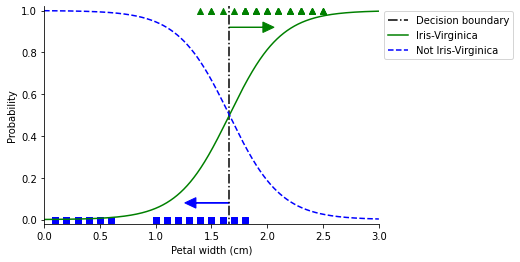

In [3]:
########################
# Fig 2.11
# Initially use 1 feature, 2 classes

x = iris["data"][:, 3:]  # petal width
y = (iris["target"] == 2).astype(jnp.int32)  # 1 if Iris-Virginica, else 0'

logistic_regression = LogisticRegression(solver="lbfgs", C=1)
logistic_regression.fit(x, y)

x_new = jnp.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = logistic_regression.predict_proba(x_new)
decision_boundary = x_new[y_proba[:, 1] >= 0.5][0]

plt.figure()
plt.scatter(x[y == 0], y[y == 0], s=SCATTER_SIZE, c="b", marker="s")
plt.scatter(x[y == 1], y[y == 1], s=SCATTER_SIZE, c="g", marker="^")
plt.plot(
    [decision_boundary, decision_boundary],
    [-1, 2],
    color="black",
    linestyle="-.",
    label="Decision boundary",
)
plt.plot(x_new, y_proba[:, 1], "g-", label="Iris-Virginica")
plt.plot(x_new, y_proba[:, 0], "b--", label="Not Iris-Virginica")

plt.arrow(decision_boundary, 0.08, -0.3, 0, head_width=0.05, head_length=0.1, fc="b", ec="b")
plt.arrow(decision_boundary, 0.92, 0.3, 0, head_width=0.05, head_length=0.1, fc="g", ec="g")

plt.xlabel("Petal width (cm)")
plt.ylabel("Probability")
plt.legend(bbox_to_anchor=(1, 1))
plt.axis([0, 3, -0.02, 1.02])
sns.despine()
savefig("iris-logreg-1d_latexified.pdf")

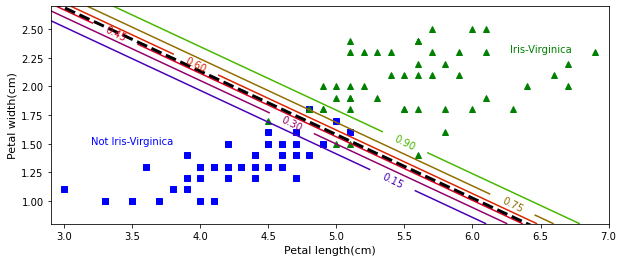

In [4]:
########################
# Now use 2 features, 2 classes

# Train Data

# petal length, petal width
train_x = iris["data"][:, (2, 3)]

# 1 if Iris-Virginica, else 0
train_y = (iris["target"] == 2).astype(jnp.int32)

# Fit model
logistic_regression = LogisticRegression(solver="lbfgs", C=1000)
logistic_regression.fit(train_x, train_y)

# Validation data

# Generate values for petal length and petal width
test_featvec_x0, test_featvec_x1 = jnp.meshgrid(
    jnp.linspace(2.9, 7, 500),
    jnp.linspace(0.8, 2.7, 200),
)

# Plot data
plt.figure(figsize=(10, 4))
plt.plot(train_x[train_y == 0, 0], train_x[train_y == 0, 1], "bs")
plt.plot(train_x[train_y == 1, 0], train_x[train_y == 1, 1], "g^")

# Combine new values of petal length, petal width
test_x = jnp.c_[test_featvec_x0.ravel(), test_featvec_x1.ravel()]

# Predict probabilities
y_pred_proba = logistic_regression.predict_proba(test_x)

# Choose probability for label Iris-Virginica
prob_iris_virginca = y_pred_proba[:, 1].reshape(test_featvec_x0.shape)

# Contour plot
contour = plt.contour(test_featvec_x0, test_featvec_x1, prob_iris_virginca, cmap=plt.cm.brg)

# Create decision boundary
bounds_test_x0 = jnp.array([2.9, 7])
decision_boundary = (
    -(logistic_regression.coef_[0][0] * bounds_test_x0 + logistic_regression.intercept_[0])
    / logistic_regression.coef_[0][1]
)

plt.clabel(contour, inline=1)
plt.plot(bounds_test_x0, decision_boundary, "k--", linewidth=3)
plt.text(3.5, 1.5, "Not Iris-Virginica", color="b", ha="center")
plt.text(6.5, 2.3, "Iris-Virginica", color="g", ha="center")
plt.xlabel("Petal length(cm)", fontsize=11)
plt.ylabel("Petal width(cm)", fontsize=11)
plt.axis([2.9, 7, 0.8, 2.7])
plt.show()

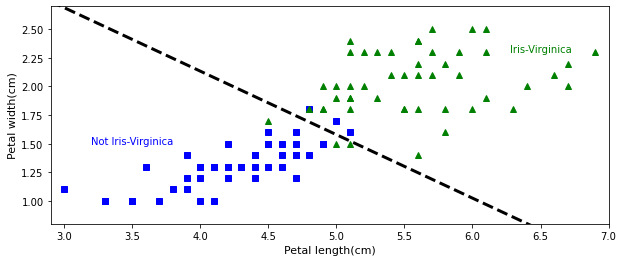

In [5]:
plt.figure(figsize=(10, 4))

# Plot train data
plt.plot(train_x[train_y == 0, 0], train_x[train_y == 0, 1], "bs")
plt.plot(train_x[train_y == 1, 0], train_x[train_y == 1, 1], "g^")

# Predictions on test data
y_pred = logistic_regression.predict(test_x)

# Plot decision boundary
bounds_test_x0 = jnp.array([2.9, 7])
decision_boundary = (
    -(logistic_regression.coef_[0][0] * bounds_test_x0 + logistic_regression.intercept_[0])
    / logistic_regression.coef_[0][1]
)

plt.plot(bounds_test_x0, decision_boundary, "k--", linewidth=3)
plt.text(3.5, 1.5, "Not Iris-Virginica", color="b", ha="center")
plt.text(6.5, 2.3, "Iris-Virginica", color="g", ha="center")
plt.xlabel("Petal length(cm)", fontsize=11)
plt.ylabel("Petal width(cm)", fontsize=11)
plt.axis([2.9, 7, 0.8, 2.7])
plt.show()

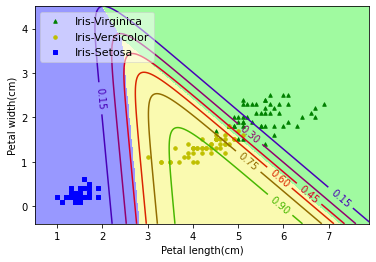

In [11]:
########################
# Now use 2 features and all 3 classes

# petal length, petal width
train_x = iris["data"][:, (2, 3)]
train_y = iris["target"]

# Fit model
softmax_reg = LogisticRegression(multi_class="multinomial", solver="lbfgs", C=1, random_state=42)
softmax_reg.fit(train_x, train_y)

# Generate values for petal length and petal width
test_featvec_x0, test_featvec_x1 = jnp.meshgrid(
    jnp.linspace(train_x[:, 0].min() - 0.5, train_x[:, 0].max() + 1, 500),
    jnp.linspace(train_x[:, 1].min() - 0.5, train_x[:, 1].max() + 2, 500),
)


SCATTER_SIZE = 12

plt.scatter(
    train_x[train_y == 2, 0],
    train_x[train_y == 2, 1],
    s=SCATTER_SIZE,
    c="g",
    marker="^",
    zorder=2,
    label="Iris-Virginica",
)
plt.scatter(
    train_x[train_y == 1, 0],
    train_x[train_y == 1, 1],
    s=SCATTER_SIZE,
    c="y",
    marker="o",
    zorder=2,
    label="Iris-Versicolor",
)
plt.scatter(
    train_x[train_y == 0, 0],
    train_x[train_y == 0, 1],
    s=SCATTER_SIZE,
    c="b",
    marker="s",
    zorder=2,
    label="Iris-Setosa",
)


# Combine new values of petal length, petal width
test_x = jnp.c_[test_featvec_x0.ravel(), test_featvec_x1.ravel()]

# Predict probabilities
y_pred_proba = softmax_reg.predict_proba(test_x)

# Make predictions
y_predict = softmax_reg.predict(test_x)

# Choose probability for label Iris-Versicolor
prob_iris_versicolor = y_pred_proba[:, 1].reshape(test_featvec_x0.shape)
y_predict = y_predict.reshape(test_featvec_x0.shape)

custom_cmap = ListedColormap(["#9898ff", "#fafab0", "#a0faa0"])
plt.contourf(test_featvec_x0, test_featvec_x1, y_predict, cmap=custom_cmap)
contour = plt.contour(test_featvec_x0, test_featvec_x1, prob_iris_versicolor, cmap=plt.cm.brg)
clb = plt.clabel(contour, inline=1)

plt.xlabel("Petal length(cm)")
plt.ylabel("Petal width(cm)")
plt.legend(loc="upper left", framealpha=0.5, fontsize=11)
plt.show()

In [7]:
def custom_cmap_lightness(color, under=0.8, over=1):
    """
    Lightens the given color by multiplying (1-luminosity) by the given amount in
    range [under,over).Input can be matplotlib color string, hex string, or RGB tuple.

    Examples:
    >> lighten_color('g', 0.3)
    >> lighten_color('#F034A3', 0.6)
    >> lighten_color((.3,.55,.1), 0.5)

    """

    # Store the colors
    color_ligten = []

    # Lighten/Darken colors
    for amount in jnp.linspace(under, over, 1000):

        try:
            rgb_c = mc.cnames[color]
        except:
            rgb_c = color

        # Convert rgb color to hls
        hls_c = colorsys.rgb_to_hls(*mc.to_rgb(rgb_c))

        # Lighten the color
        new_color = colorsys.hls_to_rgb(hls_c[0], max(0, min(1, amount * hls_c[1])), hls_c[2])

        # Add new color to list
        color_ligten.append(new_color)

    # Make new cmap
    new_cmp = LinearSegmentedColormap.from_list("testCmap", colors=color_ligten, N=256)
    return new_cmp

C:\Users\NITISH SHARMA\.pyenv\pyenv-win\versions\3.9.10\lib\site-packages\probml_utils\plotting.py:26: UserWarning: LATEXIFY environment variable not set, not latexifying
  warnings.warn("LATEXIFY environment variable not set, not latexifying")
C:\Users\NITISH SHARMA\.pyenv\pyenv-win\versions\3.9.10\lib\site-packages\probml_utils\plotting.py:79: UserWarning: set FIG_DIR environment variable to save figures
  warnings.warn("set FIG_DIR environment variable to save figures")


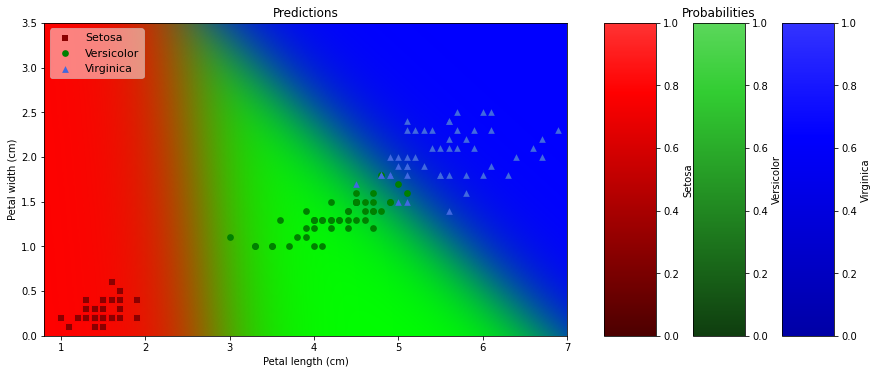

In [8]:
# Fig 2.13 - Use 2 features and all 3 classes

latexify(width_scale_factor=1, fig_width=4.5, fig_height=1.5)

# Intialize grid and define constraints for grid
if is_latexify_enabled():
    fig = plt.figure()
    grid = GridSpec(1, 4, width_ratios=[20, 1, 1, 1], wspace=0.4)
    SCATTER_SIZE = 10
    legend_fontsize = 5
else:
    # Intialize figure
    fig = plt.figure(figsize=(12, 5))
    grid = GridSpec(1, 4, width_ratios=[10, 1, 1, 1], wspace=0.4)
    SCATTER_SIZE = 45
    legend_fontsize = 11


# Position subplots
ax = fig.add_subplot(grid[0, 0])
cax1 = fig.add_subplot(grid[0, 1])
cax2 = fig.add_subplot(grid[0, 2])
cax3 = fig.add_subplot(grid[0, 3])

# Add scatter plot for probabilities and training examples
ax.scatter(
    test_featvec_x0,
    test_featvec_x1,
    c=softmax_reg.predict_proba(test_x),
    alpha=0.1,
    rasterized=True,
)


ax.scatter(
    train_x[train_y == 0, 0],
    train_x[train_y == 0, 1],
    s=SCATTER_SIZE,
    c="darkred",
    marker="s",
    edgecolor="black",
    linewidth=0.01,
    label="Setosa",
)

ax.scatter(
    train_x[train_y == 1, 0],
    train_x[train_y == 1, 1],
    s=SCATTER_SIZE,
    c="g",
    marker="o",
    edgecolor="black",
    linewidth=0.01,
    label="Versicolor",
)

ax.scatter(
    train_x[train_y == 2, 0],
    train_x[train_y == 2, 1],
    s=SCATTER_SIZE,
    c="royalblue",
    marker="^",
    edgecolor="black",
    linewidth=0.01,
    label="Virginica",
)


# Add colorbars for probabilities of each class
fig.colorbar(
    mpl.cm.ScalarMappable(cmap=custom_cmap_lightness("red", under=0.3, over=1.2)),
    cax=cax1,
    orientation="vertical",
    label="Setosa",
)

fig.colorbar(
    mpl.cm.ScalarMappable(cmap=custom_cmap_lightness("limegreen", under=0.3, over=1.2)),
    cax=cax2,
    orientation="vertical",
    label="Versicolor",
)

fig.colorbar(
    mpl.cm.ScalarMappable(cmap=custom_cmap_lightness("blue", under=0.65, over=1.2)),
    cax=cax3,
    orientation="vertical",
    label="Virginica",
)


# Labels,title and legends for scatter plot
ax.set_xlabel("Petal length (cm)")
ax.set_ylabel("Petal width (cm)")
ax.set_title("Predictions")
ax.set_xlim([0.8, 7])
ax.set_ylim([0, 3.5])
ax.legend(loc="upper left", fontsize=legend_fontsize, framealpha=0.5)

cax2.title.set_text("Probabilities")

grid.tight_layout(fig, pad=0)

savefig("iris_logreg_2d_latexified.pdf", tight_layout=False)

plt.show()

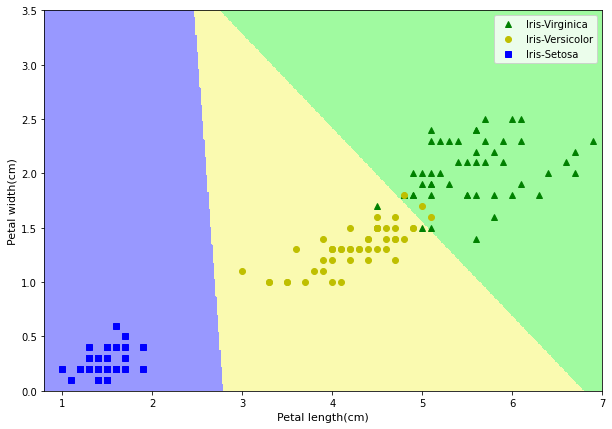

In [9]:
plt.figure(figsize=(10, 7))
plt.plot(train_x[train_y == 2, 0], train_x[train_y == 2, 1], "g^", label="Iris-Virginica")
plt.plot(train_x[train_y == 1, 0], train_x[train_y == 1, 1], "yo", label="Iris-Versicolor")
plt.plot(train_x[train_y == 0, 0], train_x[train_y == 0, 1], "bs", label="Iris-Setosa")

plt.contourf(test_featvec_x0, test_featvec_x1, y_predict, cmap=custom_cmap)
plt.xlabel("Petal length(cm)", fontsize=11)
plt.ylabel("Petal width(cm)", fontsize=11)
plt.legend(loc="upper right")
plt.axis([0.8, 7, 0, 3.5])
plt.show()

In [10]:
########################
# Fit model and evaluate on separate test set

iris = datasets.load_iris()

# We only take the first two features to make problem harder
data_x = iris.data[:, :2]
data_y = iris.target

# Train Test split
x_train, x_test, y_train, y_test = train_test_split(data_x, data_y, test_size=0.33, random_state=42)

# Fit models
logreg = LogisticRegression(solver="lbfgs", multi_class="multinomial", C=1000)
logreg.fit(x_train, y_train)

# Make Predicitons
y_pred = logreg.predict(x_test)

# Calculate Errors
errs = y_pred != y_test
count_errs = jnp.sum(errs)
print("Made {} errors out of {}, on instances {}".format(count_errs, len(y_pred), jnp.where(errs)[0]))

# Zero One classification loss
err_rate_test = zero_one_loss(y_test, y_pred)
assert jnp.isclose(err_rate_test, count_errs / len(y_pred))
err_rate_train = zero_one_loss(y_train, logreg.predict(x_train))
print("Error rates on train {:0.3f} and test {:0.3f}".format(err_rate_train, err_rate_test))

Made 10 errors out of 50, on instances [ 4 15 21 32 35 36 40 41 42 48]
Error rates on train 0.180 and test 0.200
